<a href="https://colab.research.google.com/github/SyedSihabUsSakib/Thesis/blob/master/BiLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install keras-preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.0 MB/s eta 0:00:00


In [3]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense
# from keras.callbacks import EarlyStopping

# # Load the dataset
# df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/dataset.csv")  # Replace "your_dataset.csv" with the path to your dataset file

# # Preprocess the dataset
# tokenizer = Tokenizer(num_words=6308, split= ' ')  # Set the maximum number of words to consider
# tokenizer.fit_on_texts(df['text'].values)
# X = tokenizer.texts_to_sequences(df['text'].values)
# X = pad_sequences(X)

# # Convert labels to categorical data
# y = pd.get_dummies(df['label']).values

# # Split the dataset into training and testing data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=68)

# # Define the model architecture
# model = Sequential()
# model.add(Embedding(input_dim=6308, output_dim=64, input_length=X.shape[1]))
# model.add(Bidirectional(LSTM(64, return_sequences=True,  dropout=0.2, recurrent_dropout=0.2)))
# model.add(Bidirectional(LSTM(64,  dropout=0.2, recurrent_dropout=0.2)))
# model.add(Dense(5, activation='softmax'))

# # Compile the model
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Train the model
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=9)
# model.fit(X_train, y_train, batch_size=32, epochs=56, validation_data=(X_test, y_test))

# # Evaluate the model on the test data
# loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
# print(f'Test loss: {loss:.4f}')
# print(f'Test accuracy: {accuracy:.4f}')


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense
from keras.callbacks import EarlyStopping

# Load the dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/dataset.csv')

# Preprocess the data
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['text'])
X = tokenizer.texts_to_sequences(df['text'])
X = pad_sequences(X, maxlen=100)  # Specify the maximum sequence length
y = LabelEncoder().fit_transform(df['label'])

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=95)

# Define the BiLSTM model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=64, input_length=65))  # Set the input_length to the specified maximum sequence length
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
model.fit(X_train, y_train, epochs=35, batch_size=64, validation_data=(X_val, y_val), callbacks=[es])

# Evaluate the model
_, accuracy = model.evaluate(X_val, y_val)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Epoch 1/35
35/35 [==============================] - 34s 620ms/step - loss: 1.5754 - accuracy: 0.2841 - val_loss: 1.4486 - val_accuracy: 0.3920
Epoch 2/35
35/35 [==============================] - 13s 384ms/step - loss: 1.2110 - accuracy: 0.4441 - val_loss: 1.2081 - val_accuracy: 0.3993
Epoch 3/35
35/35 [==============================] - 13s 374ms/step - loss: 0.9352 - accuracy: 0.5741 - val_loss: 1.1379 - val_accuracy: 0.5082
Epoch 4/35
35/35 [==============================] - 12s 329ms/step - loss: 0.6904 - accuracy: 0.7423 - val_loss: 1.0642 - val_accuracy: 0.5971
Epoch 5/35
35/35 [==============================] - 12s 348ms/step - loss: 0.4278 - accuracy: 0.8505 - val_loss: 1.0555 - val_accuracy: 0.6788
Epoch 6/35
35/35 [==============================] - 13s 384ms/step - loss: 0.2362 - accuracy: 0.9445 - val_loss: 0.9648 - val_accuracy: 0.7169
Epoch 7/35
35/35 [==============================] - 14s 395ms/step - loss: 0.1076 - accuracy: 0.9795 - val_loss: 1.0630 - val_accuracy: 0.7405

#Precision Recall F1

In [15]:
from sklearn.metrics import classification_report
# Evaluate the model
y_pred = model.predict(X_val)
y_pred = np.argmax(y_pred, axis=1)
target_names = ['Cy-Flaming', 'Cy-Threat','Cy-Racism','Cy-Pull-a-Pig','Not Bullying']
report = classification_report(y_val, y_pred, target_names=target_names)
print(report)

18/18 [==============================] - 2s 111ms/step
               precision    recall  f1-score   support

   Cy-Flaming       0.64      0.62      0.63       119
    Cy-Threat       0.57      0.77      0.65        88
    Cy-Racism       0.92      0.83      0.87       133
Cy-Pull-a-Pig       0.80      0.74      0.77        96
 Not Bullying       0.82      0.77      0.79       115

     accuracy                           0.75       551
    macro avg       0.75      0.75      0.74       551
 weighted avg       0.76      0.75      0.75       551



#Confusion Matrix

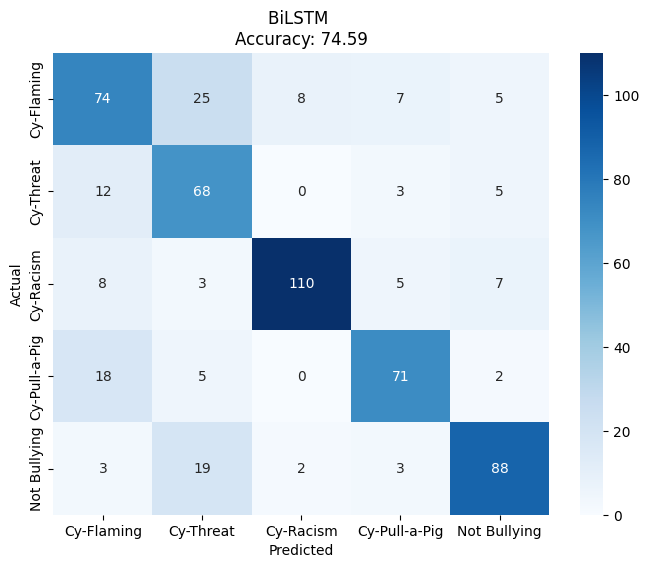

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
# Generate confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Plot confusion matrix
labels = ['Cy-Flaming', 'Cy-Threat', 'Cy-Racism', 'Cy-Pull-a-Pig', 'Not Bullying']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('BiLSTM \nAccuracy: {0:.2f}'.format(accuracy*100))
plt.show()

#ROC

18/18 [==============================] - 2s 94ms/step


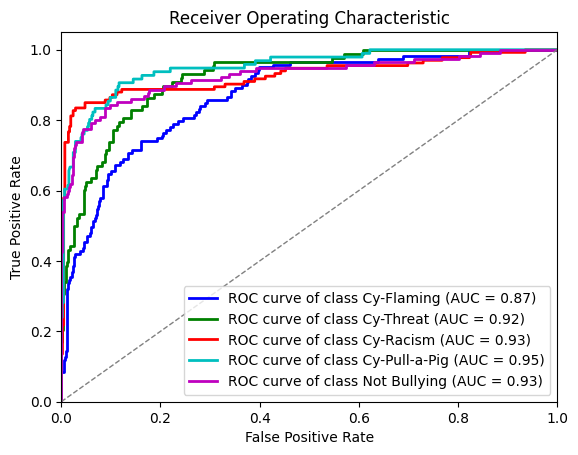

In [19]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# Make predictions on the validation set
y_pred_prob = model.predict(X_val)

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_val == i, y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = ['b', 'g', 'r', 'c', 'm']
labels = ['Cy-Flaming', 'Cy-Threat', 'Cy-Racism', 'Cy-Pull-a-Pig', 'Not Bullying']
for i in range(5):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label='ROC curve of class {0} (AUC = {1:.2f})'.format(labels[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()